<h1><center>Southern Water Corp Pump Failure Analysis</center></h1>
<h4><center>Completed by Luke Geraghty</center></h4>

---------------------------------------------------------------------------

In the Statistics unit, you used Microsoft Excel's data analytics capabilities to analyze Southern Water Corp's Pump Data. You might have realised that while Excel is powerful, it was a bit tricky to use for visualizations like Box Plots, multiple line plots, and in general there are different challenges that arise when doing quick analysis.

In this case study, you're going to revisit the Pump Data, with questions that require you to use Python to expedite your analysis. You'll also utilize some of Python's powerful plotting and modelling libraries.

---------------------------------------------------------------------------

## Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

Import the following libraries: Matplotlib, Seaborn, Pandas, and statsmodels.api

In [1]:
# Import necessary libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = (20,5)

---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 
The data you've received from Southern Water Corp has been split into two files.
The first file, titled DF_Raw_Data contains all the 'raw' Pump Data for analysis.
The second file, DF_Rolling_Stdev, contains the Rolling Standard Deviation Data needed for Question 10 onwards.

Please complete the following below:

i. Import the two data sources and store them in their own DataFrames. 

ii. Print descriptive statistics for each of the DataFrames.

In [2]:
# Import the data sources
df_raw = pd.read_csv('DF_Raw_Data.csv')

df_stdev = pd.read_csv('DF_Rolling_Stdev.csv')

# Review the data
print('\033[1m'+'Raw Data Info:'+'\033[0m','\n\n')
print(df_raw.head(2), '\n''\n')
print(df_raw.info(), '\n''\n')
print(df_raw.describe(), '\n''\n')

print('\033[1m'+'Rolling StDev Data Info:'+'\033[0m','\n\n')
print(df_stdev.head(2), '\n''\n')
print(df_stdev.info(), '\n''\n')
print(df_stdev.describe())

Raw Data Info: 


  Data Source TIMEFRAME (DD/MM/YYYY)  Volumetric Flow Meter 1  \
0         Raw         9/12/2014 0:00                     41.3   
1         Raw         9/12/2014 0:01                     42.4   

   Volumetric Flow Meter 2  Pump Speed (RPM)  Pump Torque   \
0                    41.16                98           207   
1                    41.39                92           212   

   Ambient Temperature  Horse Power  Pump Efficiency  PUMP FAILURE (1 or 0)  
0                   54         3.86            74.84                      0  
1                   46         3.71            75.25                      0   


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data Source              2453 non-null   object 
 1   TIMEFRAME (DD/MM/YYYY)   2453 non-null   object 
 2   Volumetric Flow Meter 1  2453 non-

In [3]:
print('df_raw:', '\n', df_raw.describe(), '\n''\n')
print('df_stdev:', '\n', df_stdev.describe())

df_raw: 
        Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
count              2453.000000              2453.000000       2453.000000   
mean                 41.802629                41.796702         90.796576   
std                   3.656576                 3.654873         10.217885   
min                   0.000000                 0.000000          0.000000   
25%                  41.050000                41.000000         85.000000   
50%                  42.100000                42.140000         91.000000   
75%                  43.140000                43.130000         97.000000   
max                  45.900000                45.840000        124.000000   

       Pump Torque   Ambient Temperature  Horse Power  Pump Efficiency  \
count   2453.000000          2453.000000  2453.000000      2453.000000   
mean     202.851610            50.226661     3.540897        76.015149   
std       22.683977             5.298203     0.579055         6.651633   


**When looking at the Descriptive Statistics for both datasets; pay attention specifically to the standard deviation and mean. 
What do you observe when you compare the dataframe_raw standard deviation and mean, versus the dataframe_stdev standard deviation and mean?**

**<span style="color:red">Answer:</span>**

* **The mean and standard deviation of each variable's data (except Pump Failure) are both larger in the df_raw dataset than the df_stdev dataset, whereas the mean and standard deviation of Pump Failure's data are both smaller in df_raw than df_stdev**


- Volumetric Flow Meters:
  * Mean: df_raw > df_stdev (~41.8 vs ~1.8)
  * Stdev: df_raw > df_stdev (~3.7 vs ~2.3)

- Pump Speed:
  * Mean: df_raw > df_stdev (90.8 vs 6.6)
  * Stdev: df_raw > df_stdev (10.2 vs 5.7)

- Pump Torque:
  * Mean: df_raw > df_stdev (202.6 vs 13.9) 
  * Stdev: df_raw > df_stdev (22.7 vs 12.4)

- Ambient Temperature:
  * Mean: df_raw > df_stdev (50.2 vs 3.4) 
  * Stdev: df_raw > df_stdev (5.3 vs 3.0)

- Horse Power:
  * Mean: df_raw > df_stdev (3.5 vs 0.4)
  * Stdev: df_raw > df_stdev (0.6 vs 0.3)

- Pump Efficiency: 
  * Mean: df_raw > df_stdev (76 vs 2.7)
  * Stdev: df_raw > df_stdev (6.7 vs 4.2)

- Pump Failure:
  * Mean: df_raw < df_stdev (0.021199 vs 0.021207)
  * Stdev: df_raw < df_stdev (0.144075 vs 0.144104)

---------------------------------------------------------------------------

### Step 3: <span style="color:green">Create a Boxplot</span> 

i) Using the DataFrame, create a boxplot visualising the data.

ii) Using the DataFrame, create a lineplot visualising the data.

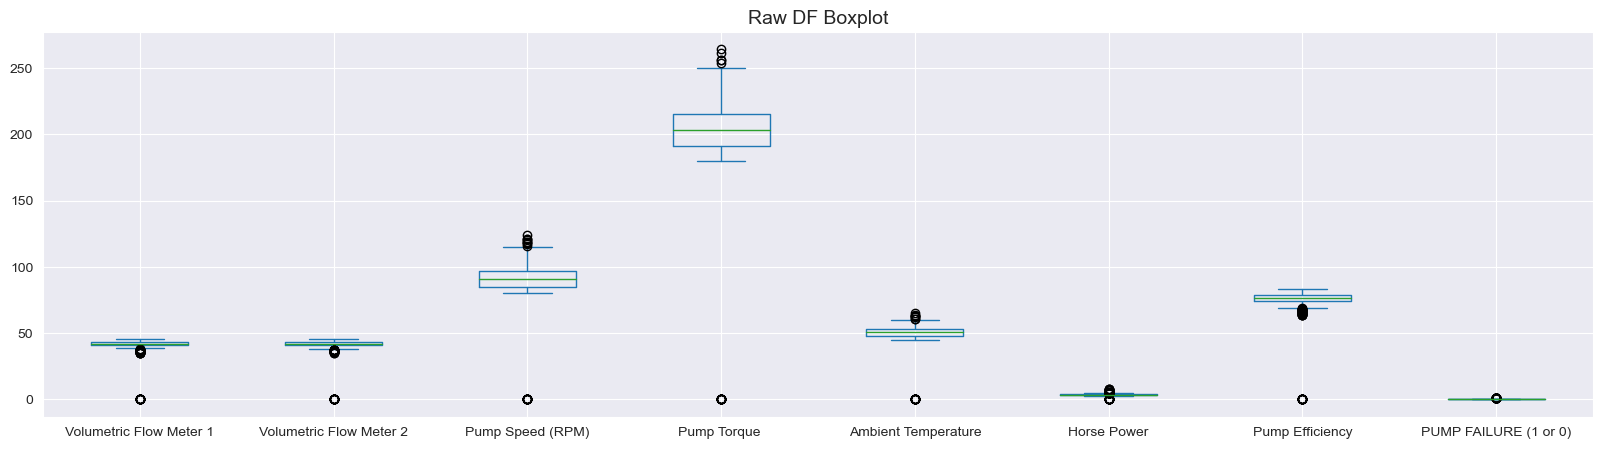

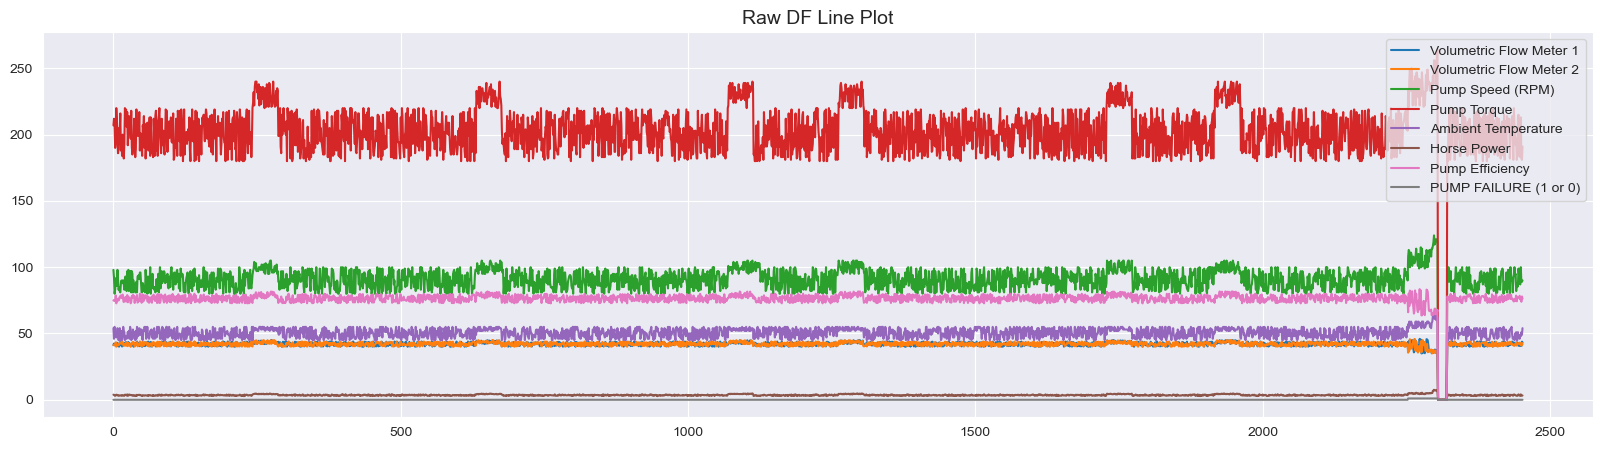

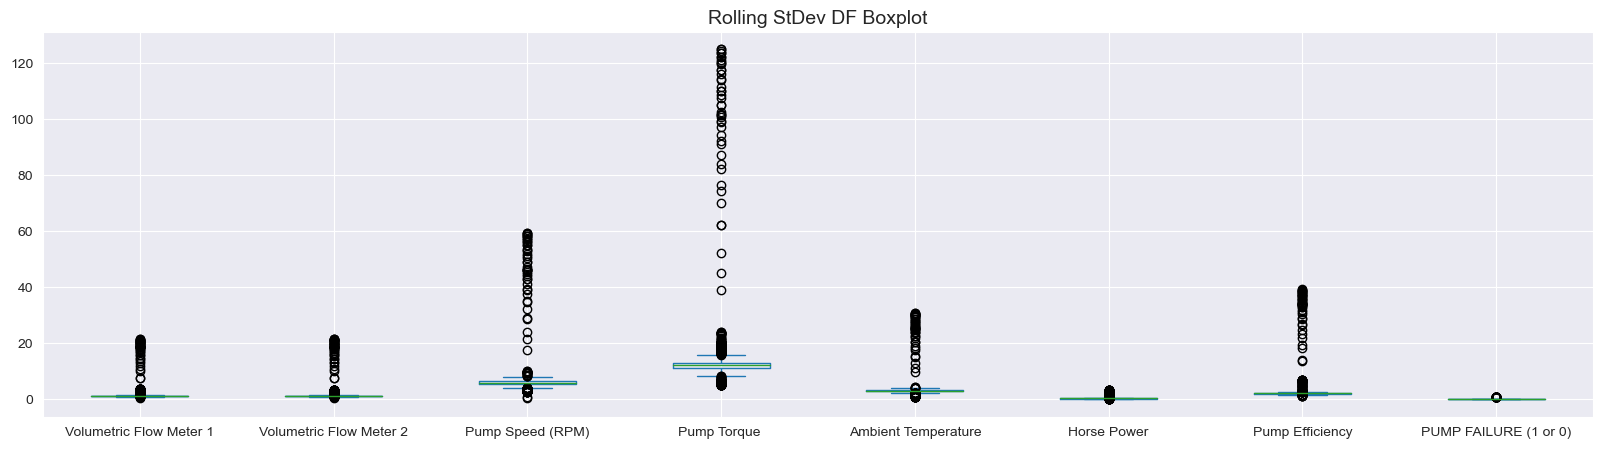

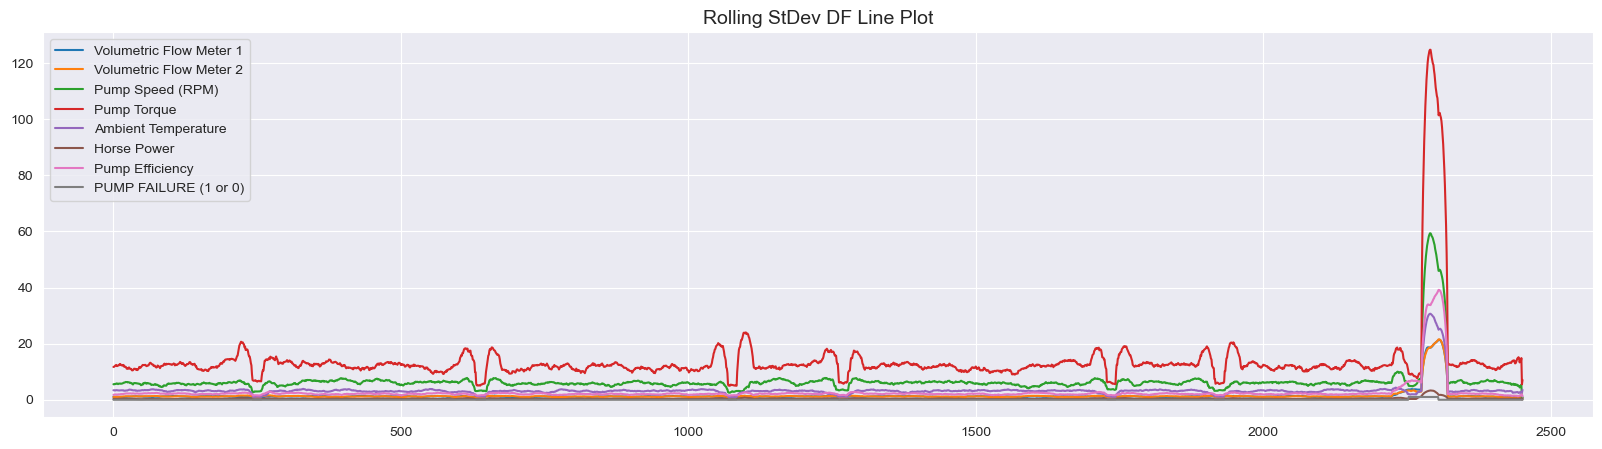

In [4]:
df_raw.plot(kind='box')
plt.title('Raw DF Boxplot', fontsize=14)
plt.show()

df_raw.plot(kind='line')
plt.title('Raw DF Line Plot', fontsize=14)
plt.show()

df_stdev.plot(kind='box')
plt.title('Rolling StDev DF Boxplot', fontsize=14)
plt.show()

df_stdev.plot(kind='line')
plt.title('Rolling StDev DF Line Plot', fontsize=14)
plt.show()

**What have you observed from the boxplot and line plots for both the dataframe_raw and dataframe_stdev datasets?**

**<span style="color:red">Answer:</span>**


- **Boxplots visualize the distribution of a dataset and are a useful tool for understanding the spread of the data and for identifying outliers...**
  - Raw Data Boxplot:
    * There is a lot of spread in the data of Pump Speed and Pump Torque. Not as much for the other variables
    * For each variable, there is a lower outlier of 0. This is from a pause of operation due to pump failure

  - Rolling StDev Data Boxplot:
    * There is a very small amount of spread in the data for each variable
    * There are many upper outliers for all of the variables (especially Pump Torque and Pump Speed), other than Pump Failure



- **Line Plots are used to visualize time-series data, making the observation of trends / patterns in data over time much clearer...**
  - Raw Data Line Plot:
    * The values of Pump Torque, Pump Speed, Ambient Temp, and Horse Power all increase before there is a pump failure at ~2300
    * The Flow Meters and Pump Efficiency both decrease significantly just before pump failure
    * The values of all variables (except Pump Failure) drop to 0 during pump failure
    * When operating normally, there are several periods when every variable's (except Pump Failure) measure increases briefly before returning to a normal levels (looks like this is when failures tend to happen occasionally)
  
  - Rolling StDev Data Line Plot:
    * The StDev plot also has periods of time when the variables values are unusual, but in these cycles the values sharply increase, then decrease, then increase again, before returning to normal. Possibly because the pumps are about to fail for some reason, but are saved from actually failing
    * Unlike the Raw Line Plot, the values of all variables in Rolling StDev data increase significantly when there is a pump failure

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Filtered DataFrames with Box Plots</span> 

You would have noted the datasets we have contain a Pump Failure (1 or 0) Variable that indicate whether the pump is failing (1) or whether the pump is behaving normally (0).  
    
It is very likely you will see differences in the overall populations of Pre-Failure vs. Post Failure.
To visualise this difference, you should separate your datasets, filtering for when the Pump Failure = 0 or when the Pump Failure = 1, and see what trends emerge. 
    
This will require you to subset your dataframe using boolean filters.


Please repeat for both the dataframe_raw dataset and the dataframe_stdev dataset. As part of best practice, don't forget to clearly title your box plots.

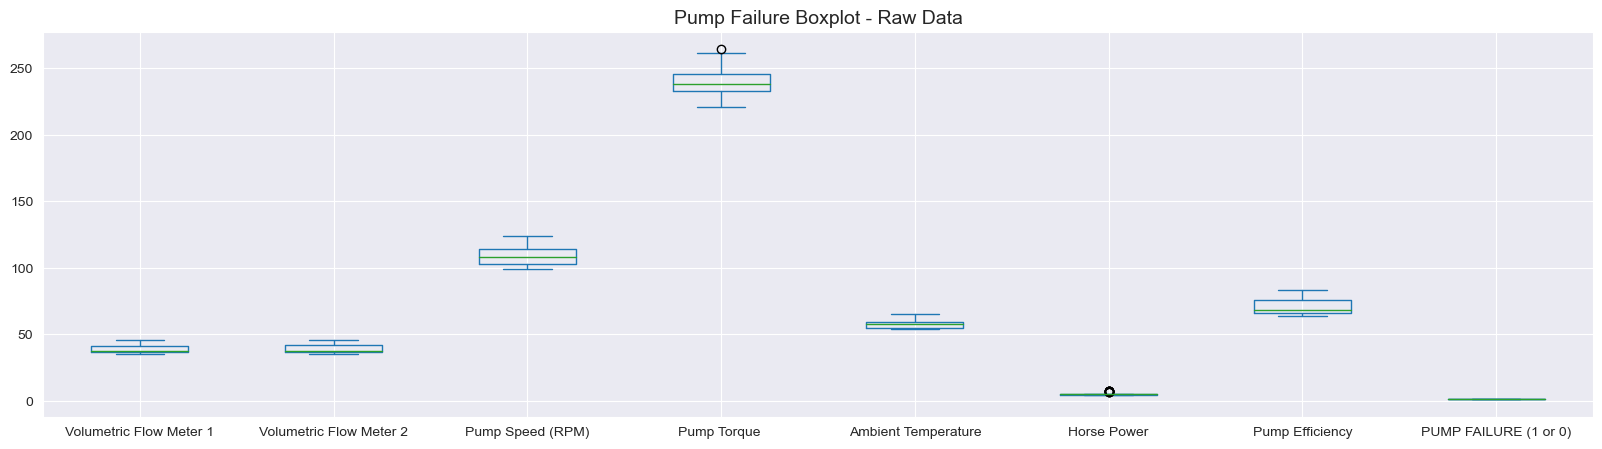

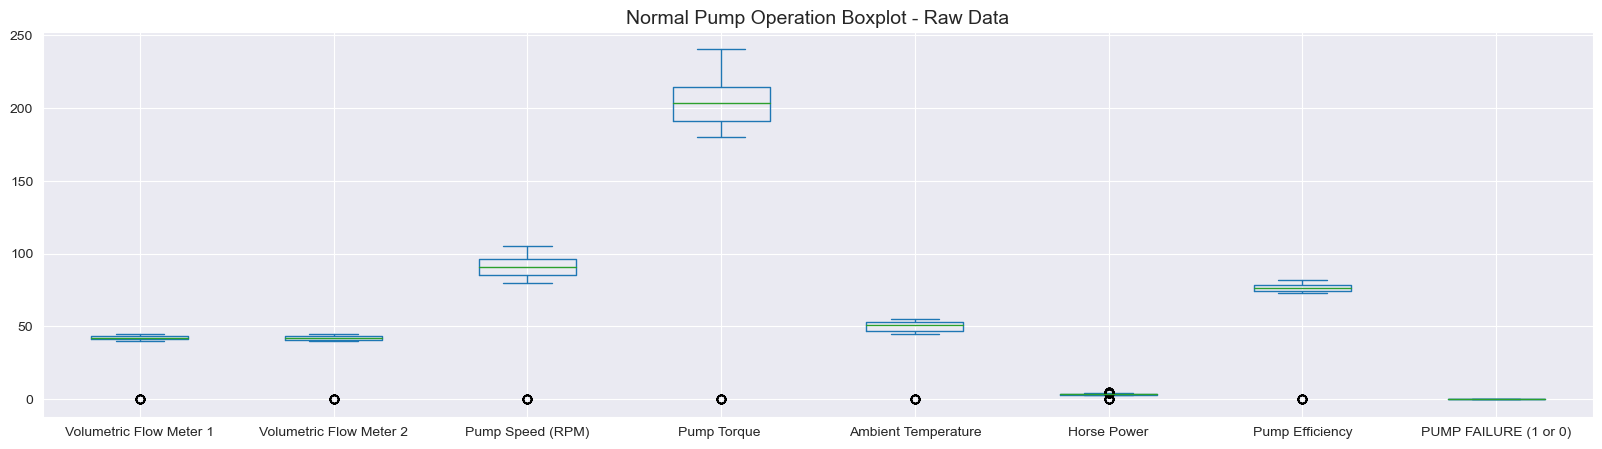

In [5]:
# Filter the DF for when pump has failed and is operating normally
c1 = df_raw['PUMP FAILURE (1 or 0)'] == 1
df_fail = df_raw[c1]

c2 = df_raw['PUMP FAILURE (1 or 0)'] == 0
df_normal = df_raw[c2]

# Create boxplots for both subsets
df_fail.plot(kind='box')
plt.title('Pump Failure Boxplot - Raw Data', fontsize=14)
plt.show()

df_normal.plot(kind='box')
plt.title('Normal Pump Operation Boxplot - Raw Data', fontsize=14)
plt.show()

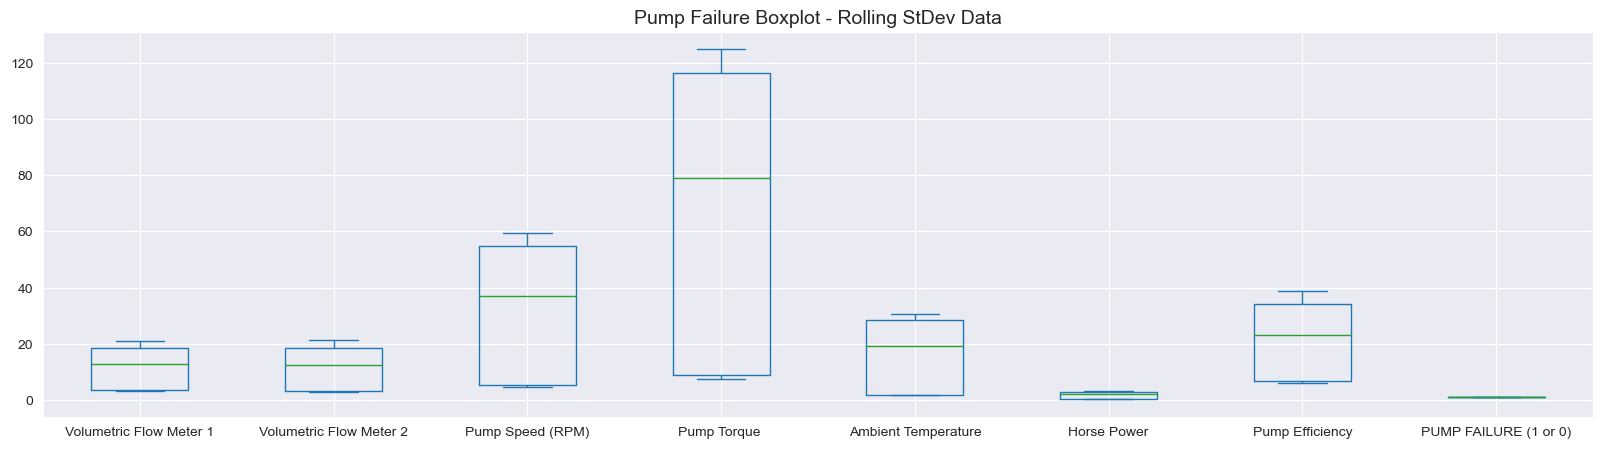

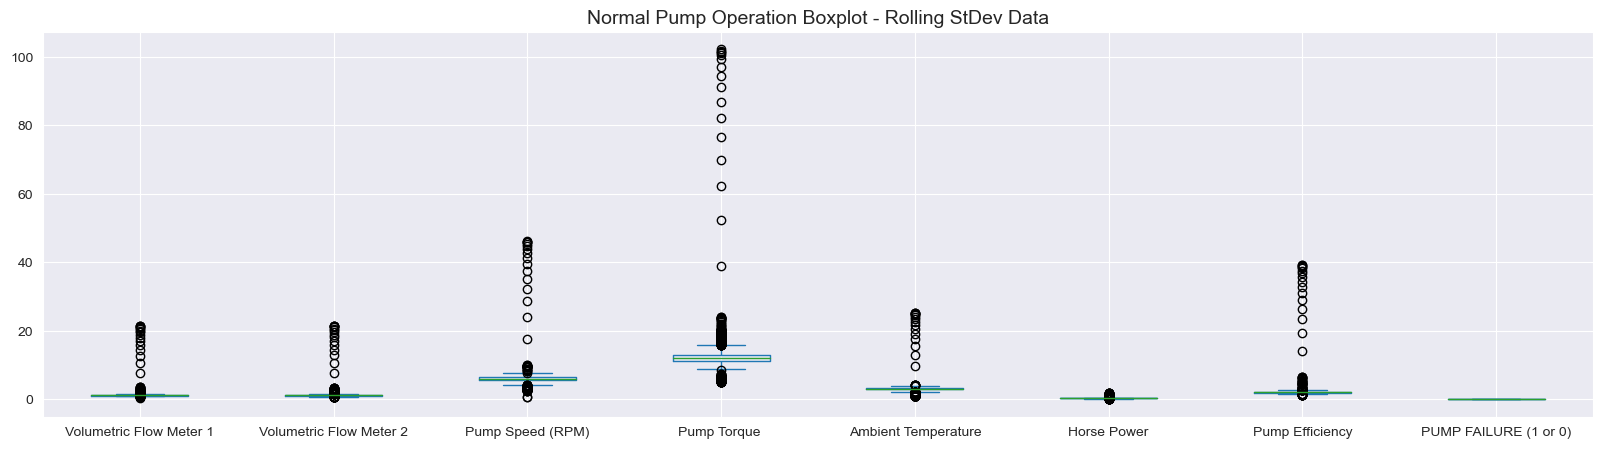

In [6]:
# Filter the DF for when pump has failed and is operating normally
c3 = df_stdev['PUMP FAILURE (1 or 0)'] == 1
df_stdev_fail = df_stdev[c3]

c4 = df_stdev['PUMP FAILURE (1 or 0)'] == 0
df_stdev_normal = df_stdev[c4]

# Create boxplots for both subsets
df_stdev_fail.plot(kind='box')
plt.title('Pump Failure Boxplot - Rolling StDev Data', fontsize=14)
plt.show()

df_stdev_normal.plot(kind='box')
plt.title('Normal Pump Operation Boxplot - Rolling StDev Data', fontsize=14)
plt.show()

**What have you noticed when you compared the dataset in this manner?**

**<span style="color:red">Answer:</span>**


- **When pump failure occurs, the spread of each variable's data is more substantial for the df_stdev dataset compared to the df_raw dataset**


- **When the pumps are operating correctly, there is significantly less dispersion in each variable's data in the df_stdev dataset compared to the df_raw dataset**


- **Also, there's a notable presence of outliers for nearly all of the variables when the pumps are in normal operation in the df_stdev dataset**

---------------------------------------------------------------------------

A quick analysis might show-case there are many *outliers* that exist in your dataset.

As you all know, outliers can easily *skew* your analysis. You might want to remove them.

The general logic for removing an outliers is: Values that are either less than Q1 - 1.5x IQR or greater than Q3 + 1.5x IQR are considered outliers.

### Step 5: <span style="color:green">Create Quartiles</span> 

Create two new variables called Q1 and Q3 using the dataframe_raw dataset. 

i)  Q1 should contain the 25th percentile for all columns in the DataFrame. Q3 should contain the 75th percentile for all columns in the DataFrame. You may want to use the .quantile() function.

ii) After defining Q1 and Q3, calculate the interquartile range for all columns and print it to the screen.

In [7]:
# Define Q1 and Q2, and calculate the IQR
Q1 = df_raw.quantile(0.25)
Q3 = df_raw.quantile(0.75)

IQR = Q3 - Q1

# Print IQR of each variable
print('IQR of Each Variable:', '\n\n', IQR)

IQR of Each Variable: 

 Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


---------------------------------------------------------------------------

### Step 6: <span style="color:green">Identify Outliers</span> 

Continuing from Step 5 - we still need to calculate how we can remove our outliers.

We're aware of the overall formula as shown: Outlier = Q1 - 1.5x IQR OR Q3 + 1.5x IQR 

Now work out how to identify these outliers step by step. 

i) Define two new variables, Lower_Limit and Upper_Limit, calculated as:
- Lower_Limit = Q1 - 1.5 * IQR
- Upper_Limit = Q3 + 1.5 * IQR
   
ii) Using Lower_Limit and Upper_Limit, filter the DataFrame to include *only* the outliers. How many outliers do we have?

iii) What is the percentage of data that remains after we've removed the outliers from the dataframe_raw dataset?

In [8]:
# Create two new variables - lower_limit and upper_limit
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter the DF to include only outliers
outliers = df_raw[((df_raw < lower_limit) | ((df_raw > upper_limit))).any(axis=1)]

# Count the total number of outliers in df_raw
total_outliers = outliers.count().sum()

# Print the count
print('Total Outliers:', total_outliers)

Total Outliers: 950


C:\Users\lukeg\AppData\Local\Temp\ipykernel_34080\978991044.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df_raw[((df_raw < lower_limit) | ((df_raw > upper_limit))).any(axis=1)]


<b> You've removed the outliers and still have a significant amount of data left. Generally, do you think removing outliers is problematic? Explain your thoughts below. </b> 

**<span style="color:red">Answer:</span>**

**I think outlier removal depends on several factors, including the objective of the analysis and the context of the problem being worked out...**

- Outliers are data points significantly differing from the majority, typically identified using statistical techniques like the IQR or z-scores, providing an objective basis for their removal


- The decision to remove outliers should be based on the impact it has on the analysis
  - If the analysis focuses on central tendencies and common patterns, removing outliers can lead to a cleaner dataset with a less skewed distribution
  - However, if the analysis is concerned with rare and/or extreme observations, outliers may contain valuable information and their removal could lead to omission of relevant insights
  
  
- Understanding the source and quality of the data is crucial
  - Noisy or error-prone data may justify outlier removal, while high-quality / well-vetted data might not
  
  
- Consider alternative strategies for handling outliers, such as...
  - Transforming the data, winsorizing, or even conducting separate analyses with and without outliers to compare results
  
  
- Also, *it's essential to be transparent about the criteria and rationale for outlier removal* to ensure reproducibility and trustworthiness of analysis

---------------------------------------------------------------------------

In the previous exercise, you calculated the outliers. Now, you want to remove *all* the outliers in your dataset and create box plots to see how the data looks without outliers.  

### Step 7: <span style="color:green">Create a box plot without outliers</span> 

i) Create a new DataFrame called no_outliers and remove all the outliers from the DataFrame

ii) Using the no_outliers dataframe, create two box plots as per below:
- A boxplot when PUMP FAILURE is 1 (Failure)
- A boxplot when PUMP FAILURE is 0 (Normal Behaviour)


C:\Users\lukeg\AppData\Local\Temp\ipykernel_34080\613486030.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  no_outliers = df_raw[~((df_raw < lower_limit) | (df_raw > upper_limit)).any(axis=1)]


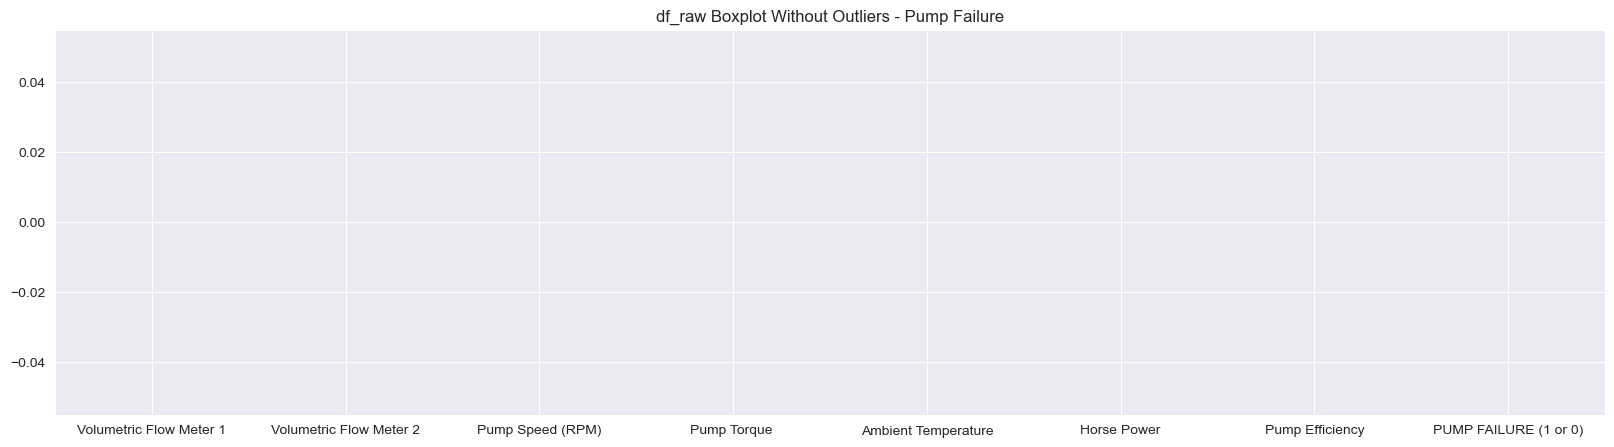

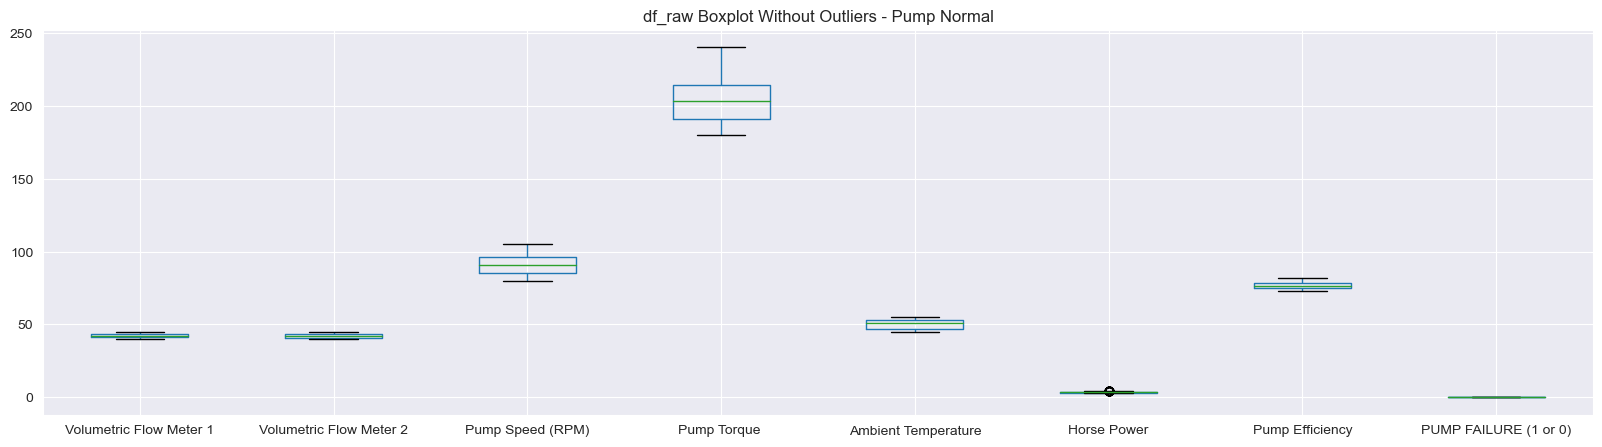

In [9]:
# Create no_outliers dataframe by removing outliers from df_raw using ~ to invert the boolean
no_outliers = df_raw[~((df_raw < lower_limit) | (df_raw > upper_limit)).any(axis=1)]

# Create boxplots of no_outliers for when there's a pump failure and when there isn't
no_outliers[no_outliers['PUMP FAILURE (1 or 0)'] == 1].boxplot()
plt.title('df_raw Boxplot Without Outliers - Pump Failure')
plt.show()

no_outliers[no_outliers['PUMP FAILURE (1 or 0)'] == 0].boxplot()
plt.title('df_raw Boxplot Without Outliers - Pump Normal')
plt.show()

<b> Did any of your plots reveal nothing to plot? If yes, why might that be...? Think very carefully regarding what you have performed. </b>

**<span style="color:red">Answer:</span>**


**I believe the first boxplot (pump failure) is empty because each observation when the pump has failed contains an outlier in at least one of the variables, and outliers have been removed from the data**

---------------------------------------------------------------------------

### Step 8: <span style="color:green">Plot and Examine Each Column</span> 

As you might recall from the earlier plot you had made with the line plot; it was hard to see which variables were the most significant with respect to pump failure when all the variables are plotted together. This is common when variables are at different scales, the trends can be more challenging to interpret. This is why we are going to iterate through the DataFrame, plot each individual variable out, and compare this with the Pump Failure for a more streamlined analysis.

This will require you to use a for loop:

1. Define a list variable called ListOfVariables; this is to contain the column names of all the numerical variables you wish to iterate through in the dataframe_raw dataset

2. Create for loop and loop through the dataframe_raw dataset, plotting every variable individually, against the Pump Failure to better identify trends

Tip: For each plot, ensure that you're using dual axes

In [10]:
print(df_raw.columns)

Index(['Data Source', 'TIMEFRAME (DD/MM/YYYY)', 'Volumetric Flow Meter 1',
       'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ',
       'Ambient Temperature', 'Horse Power', 'Pump Efficiency',
       'PUMP FAILURE (1 or 0)'],
      dtype='object')


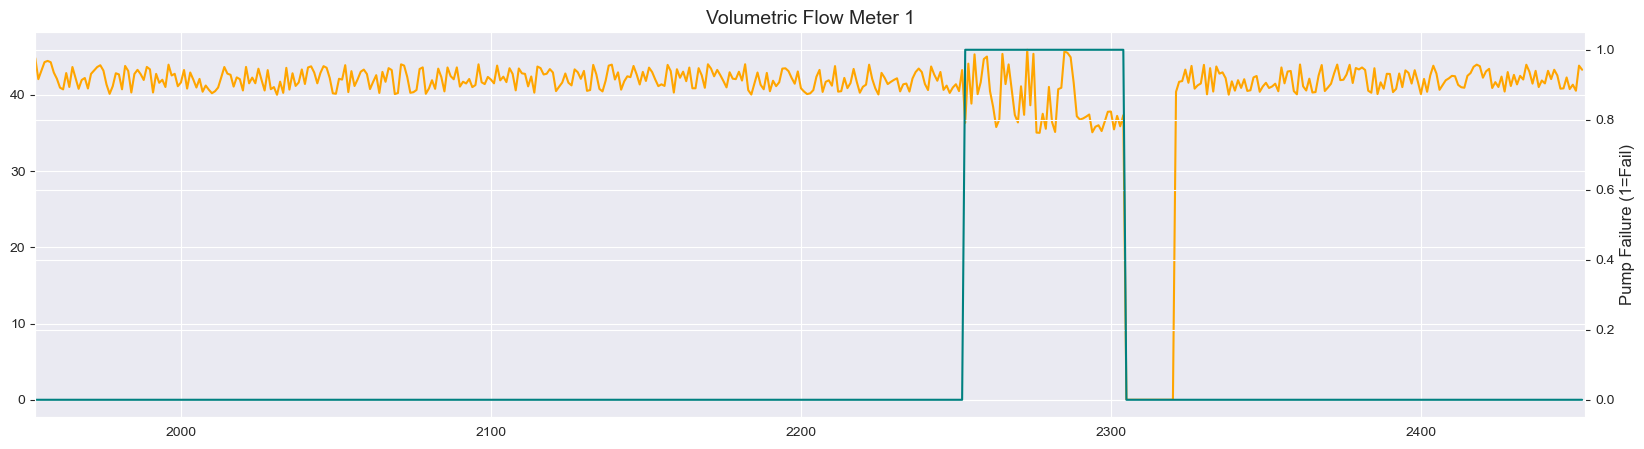

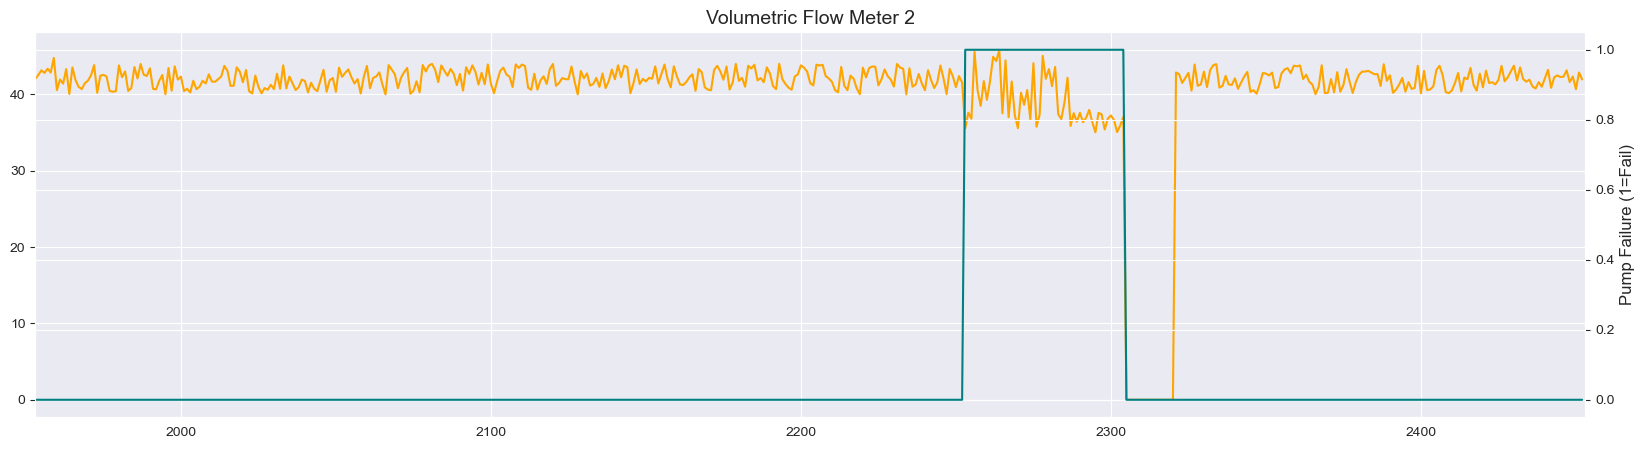

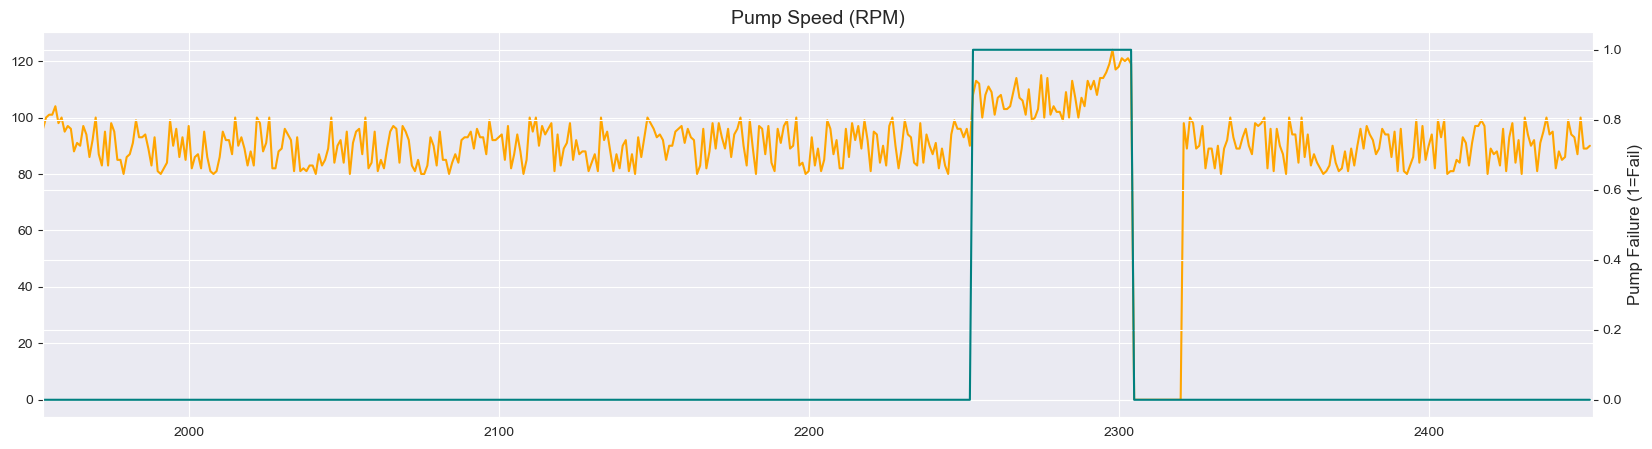

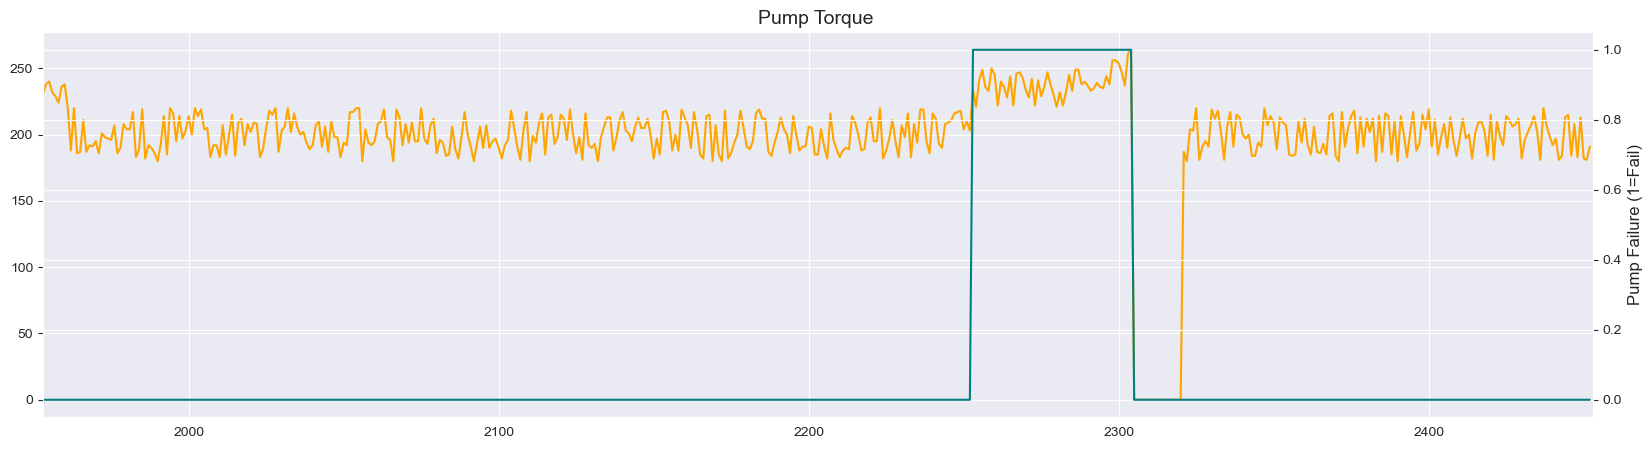

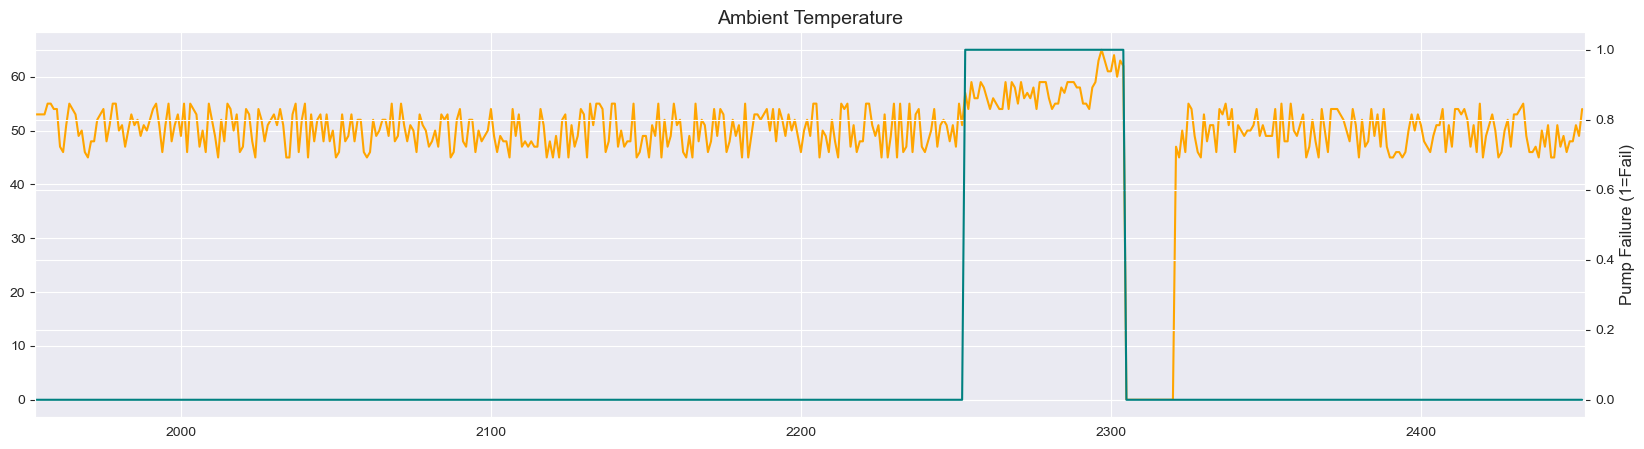

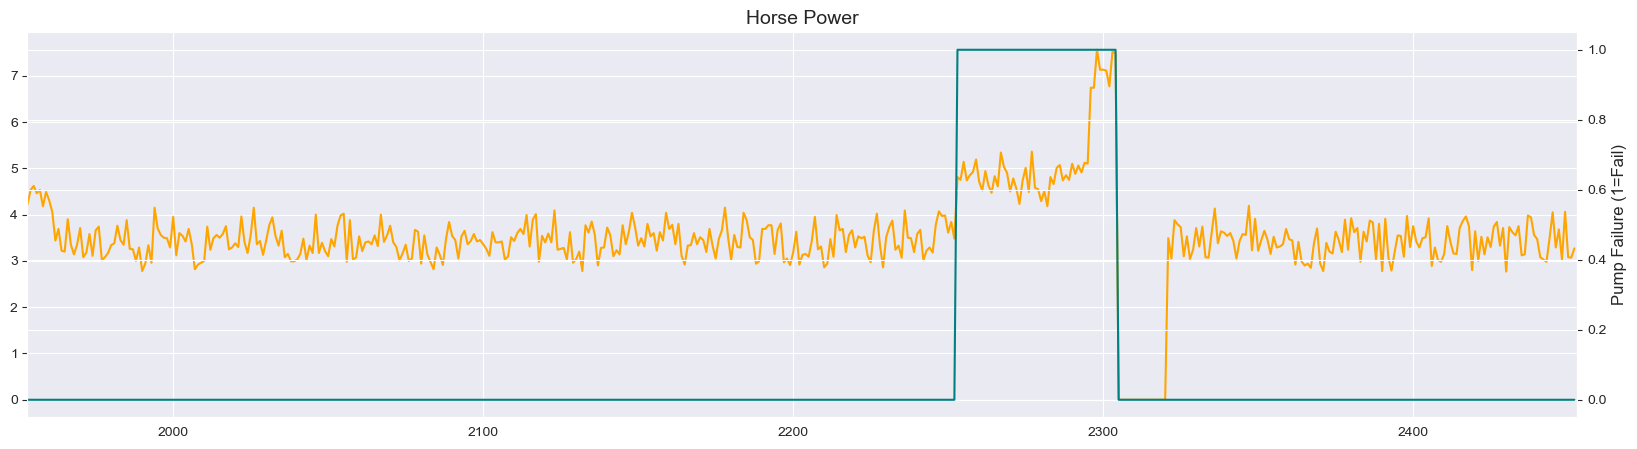

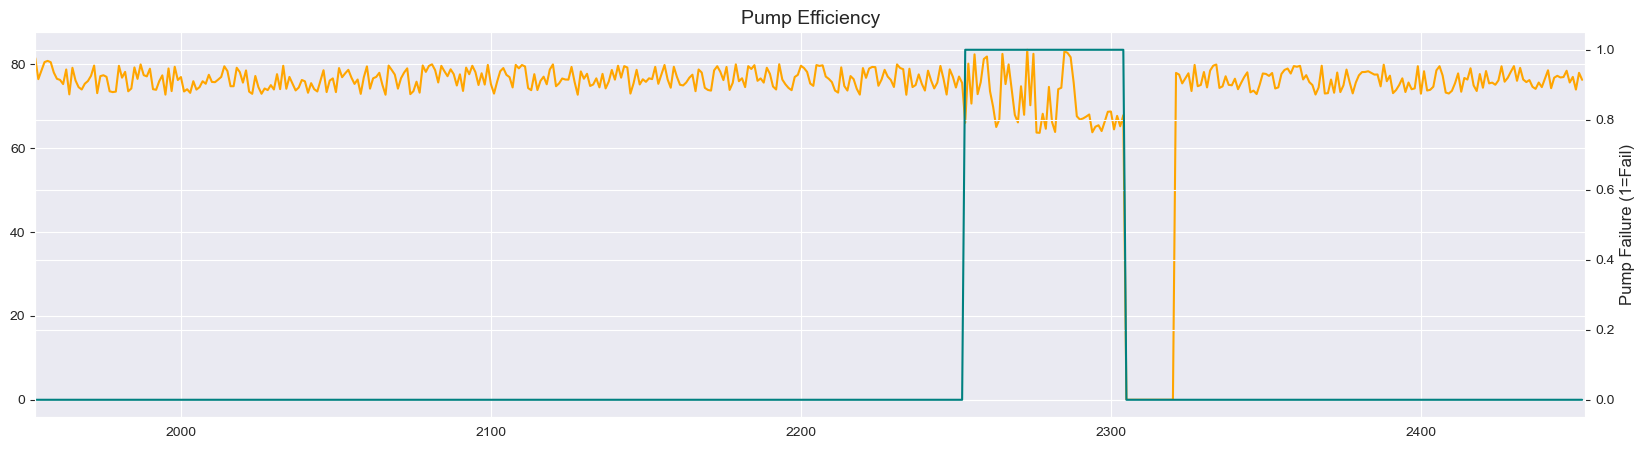

In [20]:
# Create the list of variables using column names of variables to plot
list_of_variables = ['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency']

# Use a for loop to create a plot for each variable separately
for item in list_of_variables:
    axis1 = df_raw[item].plot(color='orange')
    n = len(df_raw)
    axis1.set_xlim([n-500,n])
    axis2 = axis1.twinx()
    axis2.plot(df_raw['PUMP FAILURE (1 or 0)'], color='teal')
    plt.title(item, fontsize=14)
    axis2.set_ylabel('Pump Failure (1=Fail)', fontsize=12)
    plt.show()

<b> Have you noticed any particular trends when looking at the data in this way? Has it made it easier to see which variables *might* be reacting more strongly to the Pump Failure than others? </b> 

**<span style="color:red">Answer:</span>**

- **By visualizing the data in this manner, it's clear there's a dramatic spike in Horse Power during pump failure**
  * **It was too hard to notice beforehand, as the plot wasn't focused in on each ind. variable's status during pump failure**
  
- **Both Volumetric Flow Meters as well as Pump Efficiency measures drop slightly during failure**

- **There's a modest increase in the measures for Pump Speed, Pump Torque, and Ambient Temperature during pump failure (change not as substantial as Horse Power)**

---

<h3>  <span style="color:green">This is where we will switch to using the dataframe_stdev that you had previously defined in Q1, dataframe_stdev </span> </h3>

**Now that you've iterated through the df_raw, we're going to do something similar with the df_stdev dataset.**

In the next few exercises, you'll be seeking to better understand how to make use of Python's inferential statistics and plotting libraries to focus on periods of interest to examinate further.

First, prepare df_stdev with the TIMEFRAME (DD/MM/YYYY) column from df_raw set as the index...

### Step 9: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

i) Set the index of the df_stdev dataset to the TIMEFRAME (DD/MM/YYYY) column from df_raw

ii) Using the List_Of_Variables you created in Step 8, re-plot all the numerical variables in the df_stdev for the following time periods: 10/12/2014 12:00 to 10/12/2014 14:30

In [61]:
# Join df_raw with df_stdev to get the dates column in df_stdev
df_stdev = df_stdev.join(df_raw['TIMEFRAME (DD/MM/YYYY)'])

In [72]:
# Make sure join worked
print(df_stdev.head(3))

                                      Data Source  Volumetric Flow Meter 1  \
TIMEFRAME (DD/MM/YYYY)                                                       
9/12/2014 0:00          Rolling Stdev (30 Minute)                     1.04   
9/12/2014 0:01          Rolling Stdev (30 Minute)                     1.04   
9/12/2014 0:02          Rolling Stdev (30 Minute)                     1.03   

                        Volumetric Flow Meter 2  Pump Speed (RPM)  \
TIMEFRAME (DD/MM/YYYY)                                              
9/12/2014 0:00                             1.11              6.36   
9/12/2014 0:01                             1.06              6.26   
9/12/2014 0:02                             1.06              6.17   

                        Pump Torque   Ambient Temperature  Horse Power  \
TIMEFRAME (DD/MM/YYYY)                                                   
9/12/2014 0:00                 12.23                  3.1         0.36   
9/12/2014 0:01                 12.23     

In [63]:
# Make the date column the index of df_stdev
df_stdev.set_index(['TIMEFRAME (DD/MM/YYYY)'], inplace=True)

In [64]:
# Filter the df_stdev for time period as new dataframe, df_time_filtered
df_time_filtered = df_stdev[(df_stdev.index >= "10/12/2014 12:00") & (df_stdev.index <= "10/12/2014 14:30")]

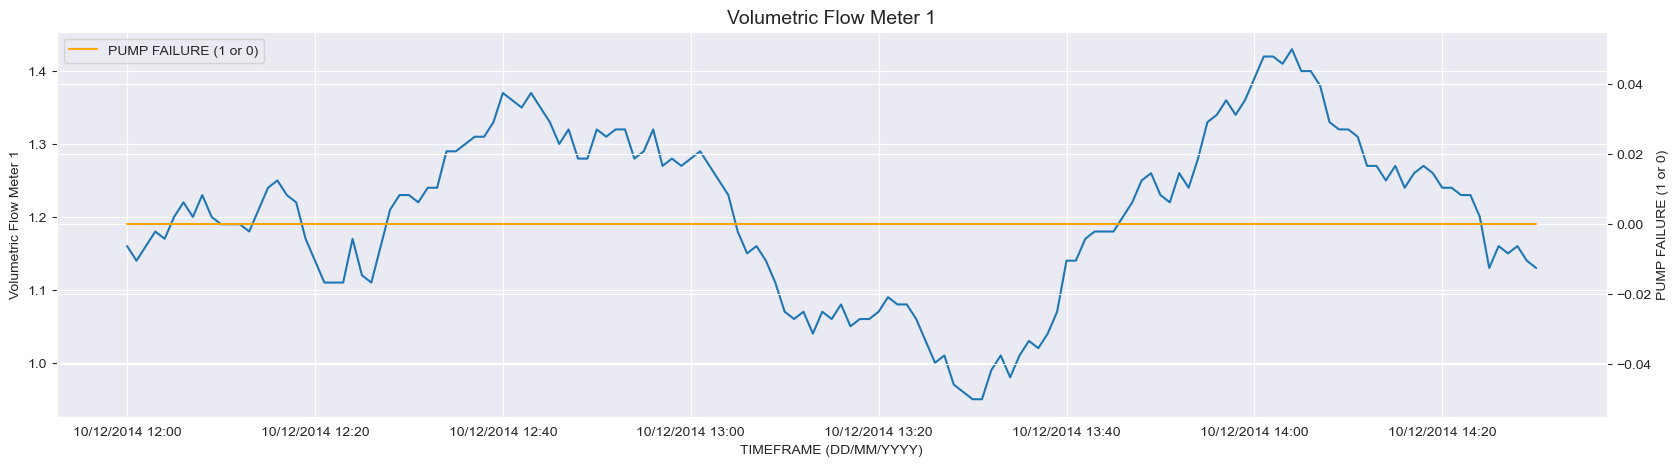

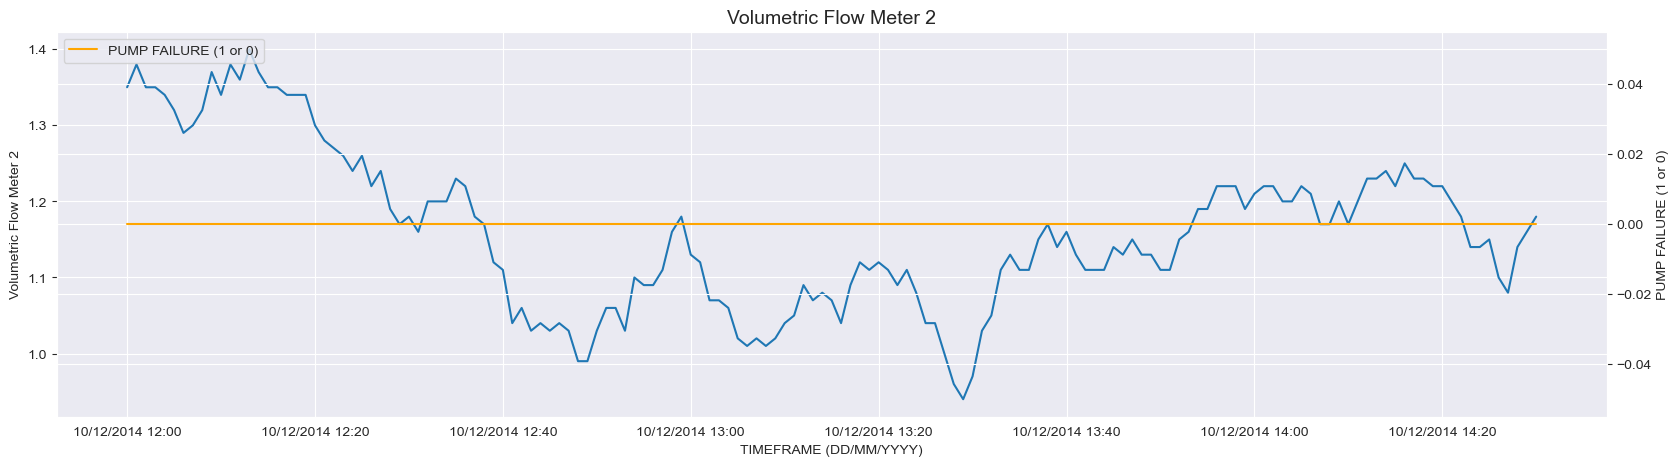

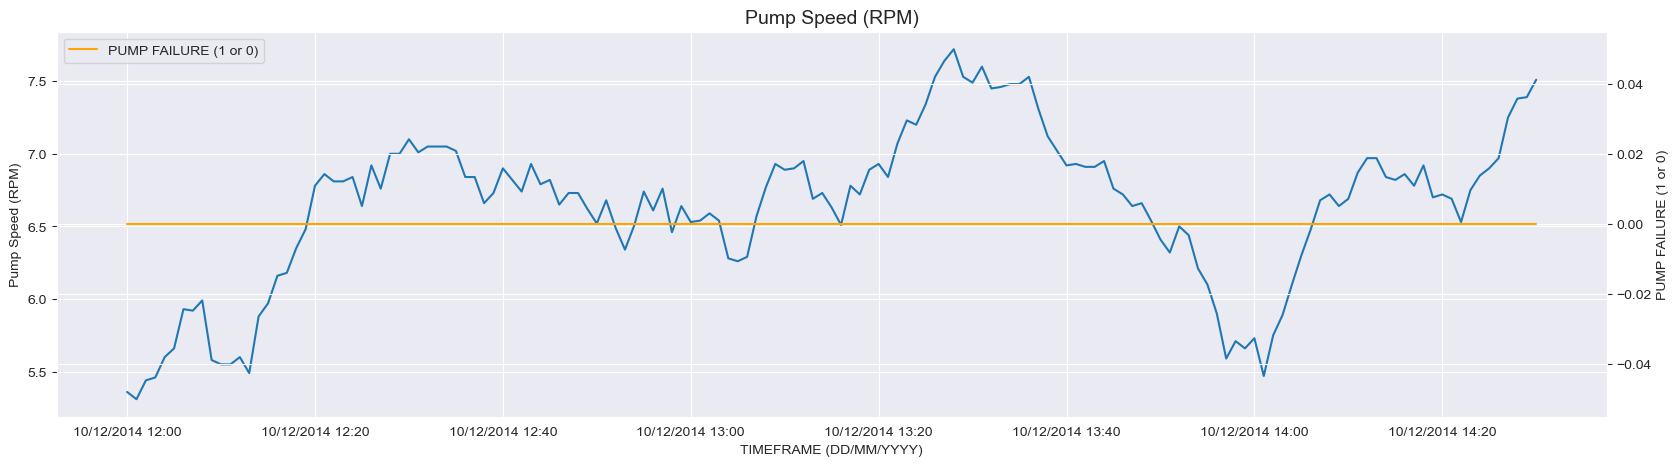

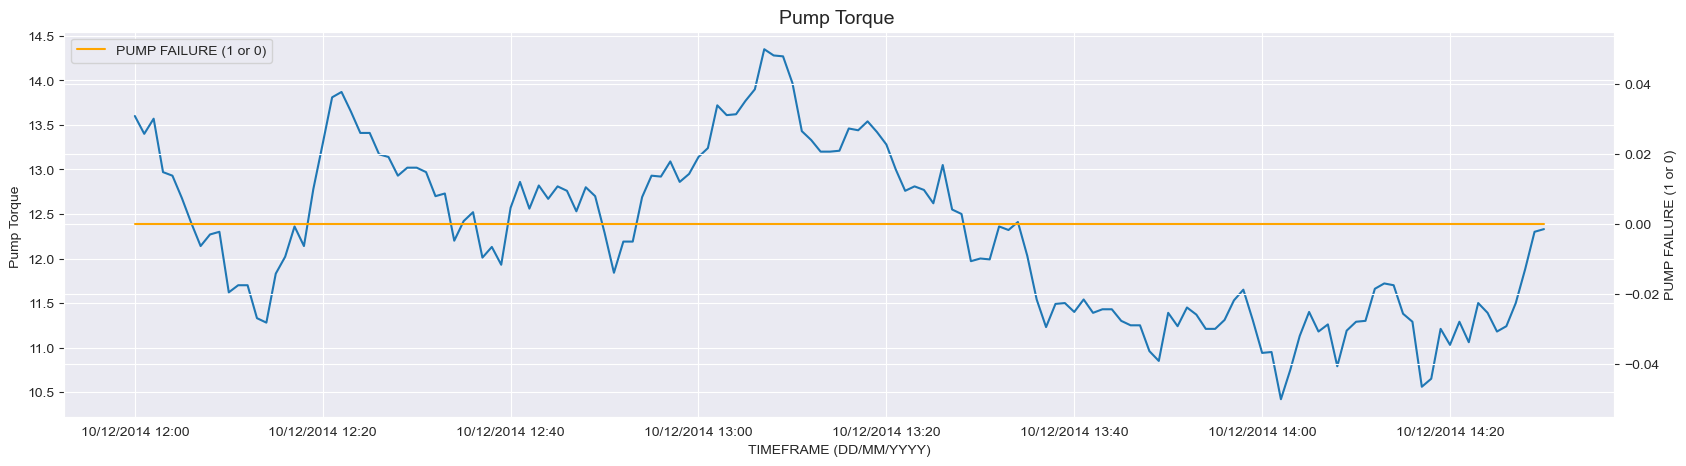

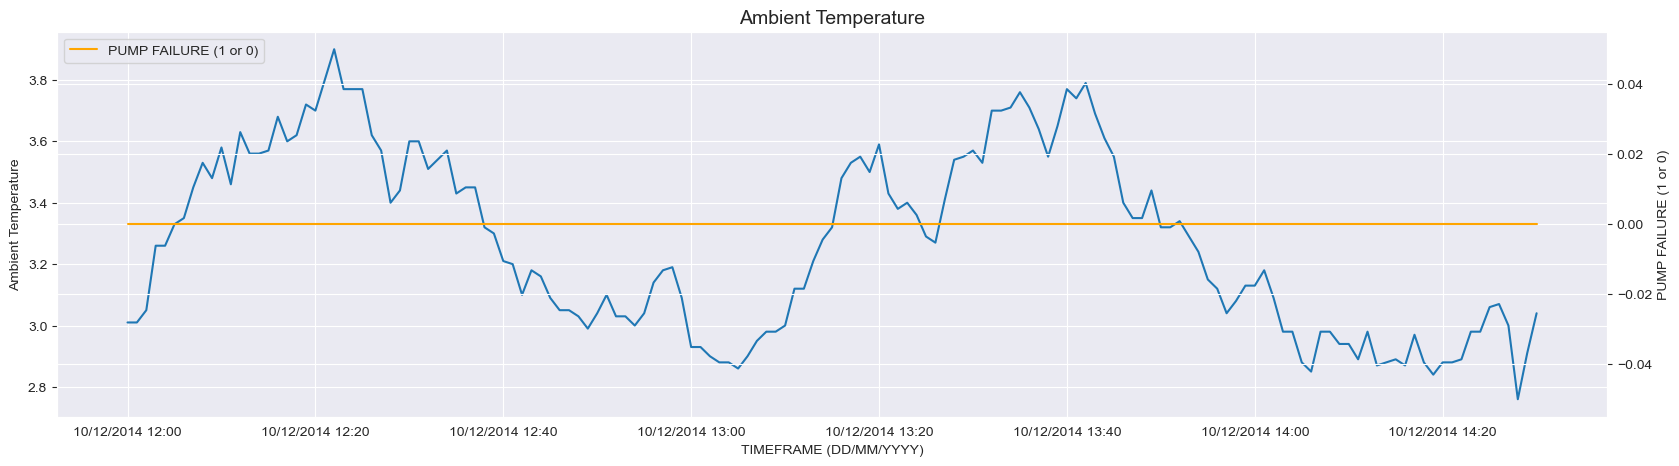

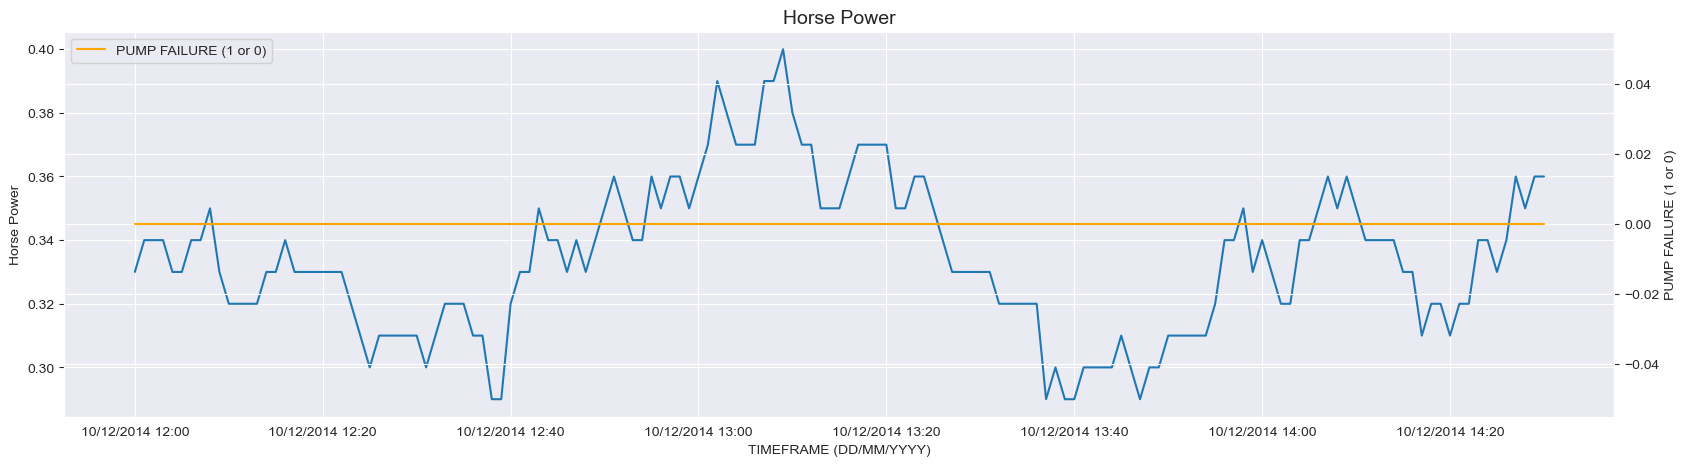

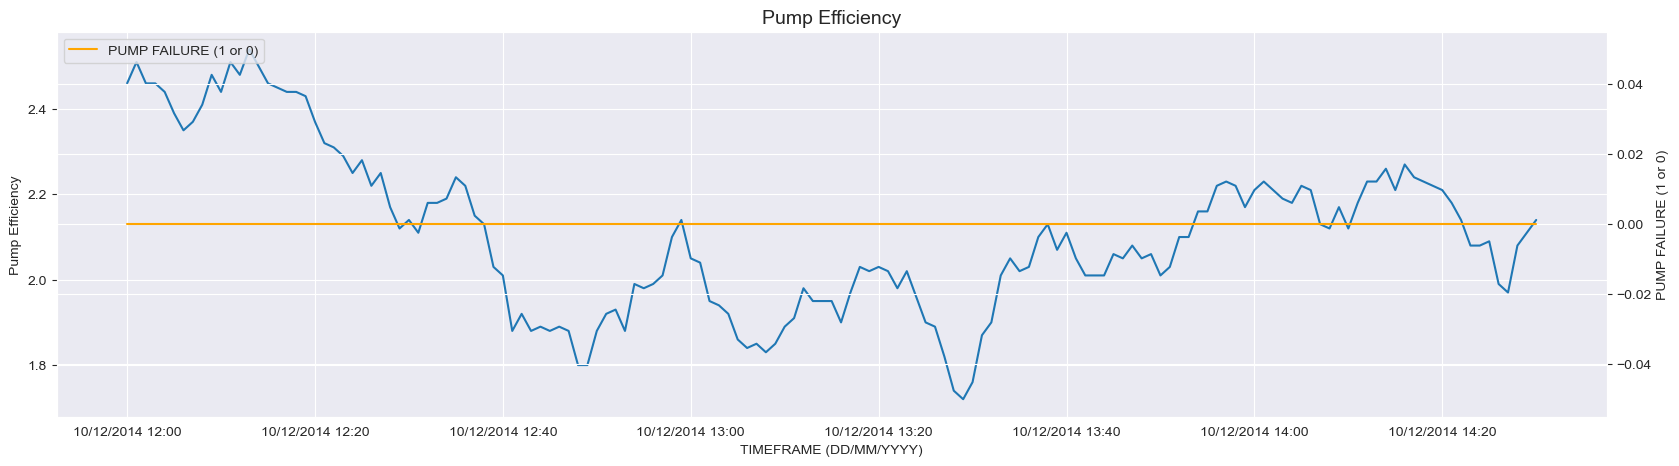

In [71]:
# Loop through each item in list_of_variables to plot
for item in list_of_variables:
    first_axis = df_time_filtered[item].plot(label=item)
    first_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
    second_axis = first_axis.twinx()
    second_axis.plot(df_time_filtered['PUMP FAILURE (1 or 0)'], color='orange', label='PUMP FAILURE (1 or 0)')
    second_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
    first_axis.set_ylabel(item)
    second_axis.set_ylabel('PUMP FAILURE (1 or 0)')
    plt.title(item, fontsize=14)
    plt.legend(loc='upper left')
    print('\n\n')
    plt.show()

---

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

When you performed inferential statistics for Southern Water Corp using Excel, you made use of the data analysis package to create a heatmap using the correlation function. The heatmap showed the attributes that strongly correlated to Pump Failure. 

Now, you'll create a heatmap using Seaborn's heatmap function.

### Step 10: <span style="color:purple">Create a Heatmap</span> 
i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (R) for all variables using the dataframe_raw dataset.

<AxesSubplot:>

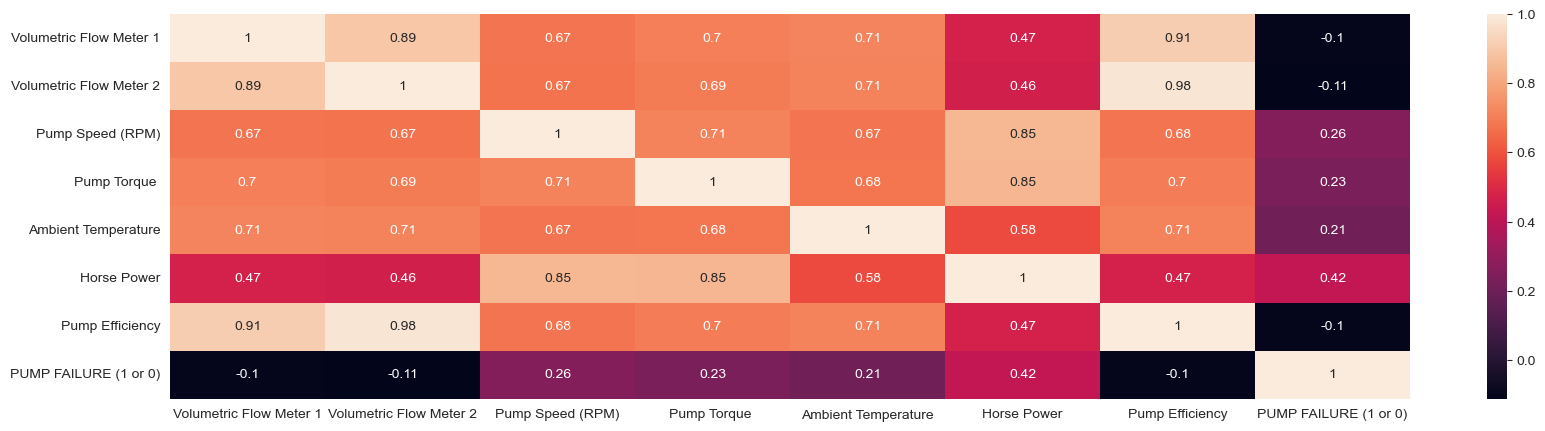

In [74]:
# Create correlation matrix
corr_matrix = df_raw.corr()

# Generate heatmap
sns.heatmap(corr_matrix, annot=True)

**Which variables seem to correlate with Pump Failure?**


**<span style="color:red">Answer:</span>**


* **Horse Power: There is a moderate positive correlation with Pump Failure, indicating a discernable relationship, although not particularly strong**
* **Pump Speed, Pump Torque, and Ambient Temp: These variables also show positive correlations with Pump Failure, but their relationships are not as robust as that of Horse Power**
* **Flow Meters and Pump Efficiency: Both of these variables exhibit weak negative correlations with Pump Failure**

---------------------------------------------------------------------------


### Step 11: <span style="color:purple">Create a Barplot of Correlated Features</span>
i) Using the correlated DataFrame you created earlier, create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order... You'll have to think carefully regarding this question!

In [278]:
# Get correlation values of all variables (except PUMP FAILURE) alone in a new dataframe and sort
correlation = corr_matrix['PUMP FAILURE (1 or 0)']

correlation = correlation.drop('PUMP FAILURE (1 or 0)')

correlation_sorted = correlation.sort_values(ascending=False)

print(correlation_sorted)

Horse Power                0.421694
Pump Speed (RPM)           0.260016
Pump Torque                0.233193
Ambient Temperature        0.207946
Volumetric Flow Meter 1   -0.102508
Pump Efficiency           -0.102696
Volumetric Flow Meter 2   -0.112115
Name: PUMP FAILURE (1 or 0), dtype: float64


You might think to yourself this looks like a DataFrame with columns that you can manipulate... You can!

With this in mind, you should be able to select the relevant column of interest and combine this with the .plot(kind='__') function to answer the question.

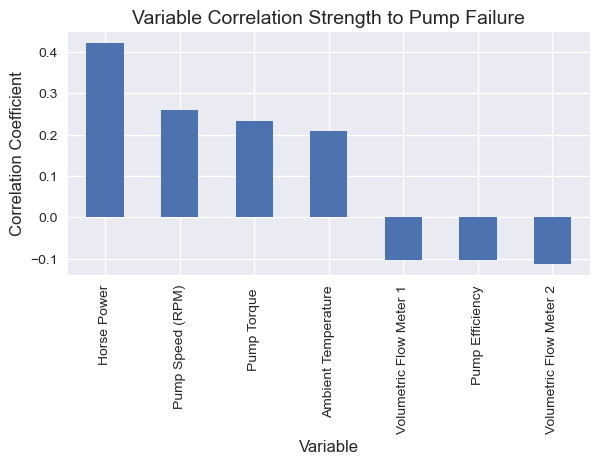

In [277]:
# Plot variable correlations in a bar chart
plt.figure(figsize=(6, 3))
correlation_sorted.plot(kind='bar')
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xlabel('Variable', fontsize=12)
plt.style.use('seaborn')
plt.title('Variable Correlation Strength to Pump Failure', fontsize=14)
plt.show()

---

### Step 12: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 
Previously, you created a correlation matrix using 'raw' variables. We saw *some* correlations with the raw data but they weren't necessarily as strong as we would have liked. 

This time, we'll recreate a Heatmap using the dataframe_stdev dataset. 

i) Create a heatmap that clearly shows the correlations (including R) for all variables using the dataframe_stdev dataset.


<AxesSubplot:>

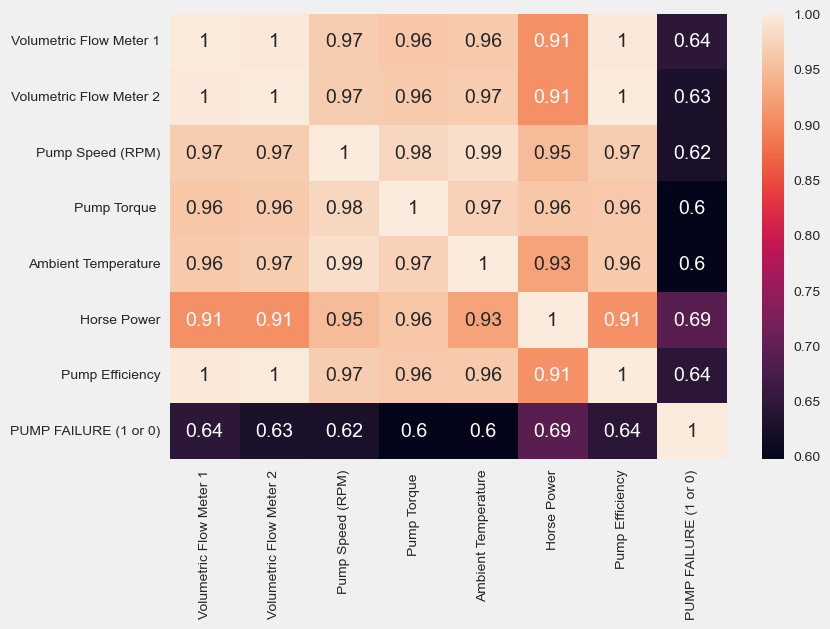

In [96]:
# Create correlation matrix
corr_matrix_stdev = df_stdev.corr()

# Create heatmap with Seaborn
sns.heatmap(corr_matrix_stdev, annot=True)

<b> Do any variables stand out? If yes, list these out below your heatmap. </b>

**<span style="color:red">Answer:</span>**

* **When using the df_stdev dataset instead of df_raw, much stronger correlations can be observed between all of the independent variables and pump failure**
  * ***Horse Power* still exhibits the strongest correlation with pump failure**
  * **Notably, all the variables now have positive correlations with pump failure**

---------------------------------------------------------------------------

### Creating a Multivariate Regression Model


When you worked on this case study in Excel, you went through the tricky process of using the rolling standard deviation variables to generate a regression equation. This process is much simpler in Python.  

For this step, you'll be using the statsmodel.api library you imported earlier and calling the OLS Regression to create a multivariate regression model.

### Step 13: <span style="color:purple">Use OLS Regression</span> 
i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all your independent variables in the dataframe_raw dataset.

ii) Repeat, but this time use dataframe_stdev.

In [267]:
# Examine df_raw
print(df_raw.head(1))
print(df_raw.dtypes)

  Data Source TIMEFRAME (DD/MM/YYYY)  Volumetric Flow Meter 1  \
0         Raw         9/12/2014 0:00                     41.3   

   Volumetric Flow Meter 2  Pump Speed (RPM)  Pump Torque   \
0                    41.16                98           207   

   Ambient Temperature  Horse Power  Pump Efficiency  PUMP FAILURE (1 or 0)  
0                   54         3.86            74.84                      0  
Data Source                 object
TIMEFRAME (DD/MM/YYYY)      object
Volumetric Flow Meter 1    float64
Volumetric Flow Meter 2    float64
Pump Speed (RPM)             int64
Pump Torque                  int64
Ambient Temperature          int64
Horse Power                float64
Pump Efficiency            float64
PUMP FAILURE (1 or 0)        int64
dtype: object


In [105]:
# Create df_raw OLS regression model and print summary
ind_var_raw = df_raw.drop(['PUMP FAILURE (1 or 0)', 'TIMEFRAME (DD/MM/YYYY)', 'Data Source'], axis=1)
ind_var_raw = sm.add_constant(ind_var_raw)
dep_var_raw = df_raw['PUMP FAILURE (1 or 0)']

reg_model_raw = sm.OLS(dep_var_raw, ind_var_raw).fit()

print(reg_model_raw.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Tue, 11 Apr 2023   Prob (F-statistic):          5.58e-233
Time:                           07:00:19   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [266]:
# Examine df_stdev
print(df_stdev.head(1))
print(df_stdev.dtypes)

                                      Data Source  Volumetric Flow Meter 1  \
TIMEFRAME (DD/MM/YYYY)                                                       
9/12/2014 0:00          Rolling Stdev (30 Minute)                     1.04   

                        Volumetric Flow Meter 2  Pump Speed (RPM)  \
TIMEFRAME (DD/MM/YYYY)                                              
9/12/2014 0:00                             1.11              6.36   

                        Pump Torque  Ambient Temperature  Horse Power  \
TIMEFRAME (DD/MM/YYYY)                                                  
9/12/2014 0:00                12.23                  3.1         0.36   

                        Pump Efficiency  PUMP FAILURE (1 or 0)  Prediction  \
TIMEFRAME (DD/MM/YYYY)                                                       
9/12/2014 0:00                     2.02                      0    0.017189   

                        const  
TIMEFRAME (DD/MM/YYYY)         
9/12/2014 0:00              1  
Data S

In [108]:
# Create df_stdev OLS regression model and print summary
ind_var_stdev = df_stdev.drop(['PUMP FAILURE (1 or 0)', 'Data Source'], axis=1)
ind_var_stdev = sm.add_constant(ind_var_stdev)
dep_var_stdev = df_stdev['PUMP FAILURE (1 or 0)']

reg_model_stdev = sm.OLS(dep_var_stdev, ind_var_stdev).fit()

print(reg_model_stdev.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                           07:02:32   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

<h4> <b> Compare the models you've created and observe the R Squared displayed for each model. Which model seems better and why?</b>



**<span style="color:red">Answer:</span>**

**The df_stdev model appears to be superior as it explains a greater proportion of variance in the dependent variable.**


- **The R-squared value of the df_stdev model is notably higher at 0.778, indicating that it explains approximately 77.8% of the variance in Pump Failure -- this suggests a strong fit for the data, with the model accounting for a substantial portion of the variability in Pump Failure**
  - In contrast, the df_raw model has a lower R-squared value of 0.362 (explains only about 36.2% of the variance in Pump Failure), indicating that the df_raw model is not as well-suited for the data as the df_stdev model


- **Analyzing the coefficients of the df_stdev model, it's evident that all independent variables significantly impact the dependent variable (p-values less than 0.05)** 
  - Moreover, the coefficients provide insights into the direction and strength of the relationships between each independent variable and the dependent variable
    - In the df_stdev model, Pump Torque and Volumetric Flow Meter 2 have a negative effect on Pump Failure, while Horse Power and Pump Efficiency have a positive effect


- **However, the df_raw model reveals that not all independent variables have a significant impact on the dependent variable**
  - The p-values of Pump Torque (0.072) and Pump Efficiency (0.304) exceed 0.05, indicating that they're not significant predictors of Pump Failure, while Vol Flow Meters 1 & 2, Ambient Temperature, and Horse Power each have a significant impact on Pump Failure (p-values less than 0.05)

---------------------------------------------------------------------------

### Step 14: <span style="color:purple">Analysis of Coefficients </span>

Great job creating those regressive equations! You've reached the final two steps of this case study! You've identified that *one* regressive model has a better fit than the previous model.

Using this model, we want to *extract* the coefficients to better understand the variables that display the largest *absolute* rate of change with respect to Pump Failure. We'll use the coefficients to better assess this from an *absolute* rate of change perspective. (i.e. Which variables spike the most in relation to Pump Failure?)

i) Using the .params method, extract the coefficients from the regression model and create a bar plot that identifies which coefficients react most strongly with respect to Pump Failure. Which three variables seem to showcase the
strongest 'relationship' with respect to Pump Failure?

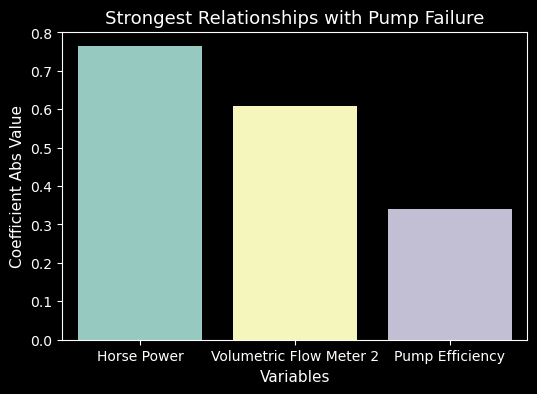

In [264]:
# Extract coefficients from df_stdev regression model & sort desc by abs value
coefficients = reg_model_stdev.params[1:]
coefficients_sorted = coefficients.abs().sort_values(ascending=False)
top_three = coefficients_sorted[:3]

# Create bar plot of coefficient values
plt.figure(figsize=(6, 4))
sns.barplot(x=top_three.index, y=top_three.values)
plt.style.use('dark_background')
plt.title('Strongest Relationships with Pump Failure', fontsize=13)
plt.xlabel('Variables', fontsize=11)
plt.ylabel('Coefficient Abs Value', fontsize=11)
plt.show()


### Step 15: <span style="color:purple">Validate Predictions</span> 

Now it's time to validate our predictions...
    
i) Create a new column in the dataframe_stdev called 'Prediction'. 
    
ii) Use the regression equation you created in the previous step and apply the .predict() function to the independent variables in the dataframe_stdev dataset to get a column full of your regressive predictions.
    
iii) Create a Dual-Axis Plot with the following:
- Axes 1: Volumetric Flow Meter 2, Pump Efficiency and Horse Power 
- Axes 2: Pump Failure (1 or 0) and Prediction

In [125]:
# Rename Pump Torque column - 'Pump Torque ' --> 'Pump Torque'
df_stdev.rename(columns={'Pump Torque ':'Pump Torque'}, inplace=True)
df_stdev.columns

Index(['Data Source', 'Volumetric Flow Meter 1', 'Volumetric Flow Meter 2',
       'Pump Speed (RPM)', 'Pump Torque', 'Ambient Temperature', 'Horse Power',
       'Pump Efficiency', 'PUMP FAILURE (1 or 0)', 'Prediction'],
      dtype='object')

In [127]:
# Add 'const' column to df_stdev for consistent shape with reg_model_stdev
df_stdev['const'] = 1

# Create new column, 'Prediction'
df_stdev['Prediction'] = 0

# Predict values using the regression model equation
df_stdev['Prediction'] = reg_model_stdev.predict(df_stdev[['const', 'Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency']])

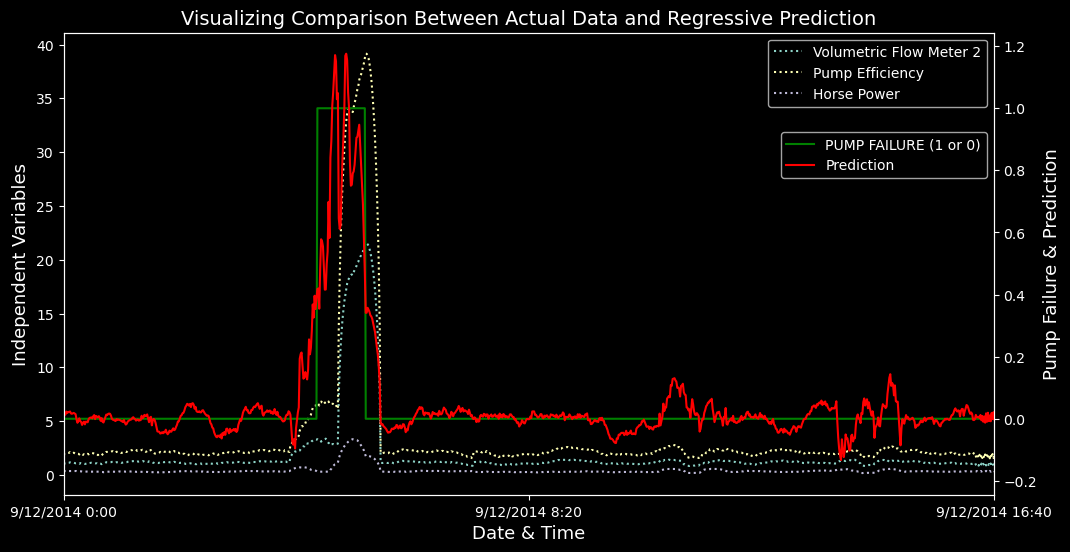

In [246]:
# Create figure and axes objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot independent variables on ax1
df_stdev.plot(ax=ax1, y=['Volumetric Flow Meter 2', 'Pump Efficiency', 'Horse Power'], style=':')

# Use twinx() to share same x axis
ax2 = ax1.twinx()

# Plot Pump Failure (dependent variable) and Regressive Prediction on ax2
df_stdev.plot(ax=ax2, y=['PUMP FAILURE (1 or 0)', 'Prediction'], color=['green','red'])

# Choose plot style
plt.style.use('dark_background')

# Set plot title
plt.title('Visualizing Comparison Between Actual Data and Regressive Prediction', fontsize=14)

# Set axis labels
ax1.set_xlabel('Date & Time', fontsize=13)
ax1.set_ylabel('Independent Variables', fontsize=13)
ax2.set_ylabel('Pump Failure & Prediction', fontsize=13)

# Position legends
legend1 = ax1.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))
legend2 = ax2.legend(loc='upper right', bbox_to_anchor=(1.0, 0.8))

# Limit x axis to zoom on pump failure
ax1.set_xlim(0, 1000)

# Show plot
plt.show()